# Проект для «Викишоп»

# Project for "Wikishop"

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

**Наша цель** - обучить модель классифицировать комментарии на позитивные и негативные. 

В нашем распоряжении **набор данных с разметкой о токсичности правок**.

У нас есть строгое указание к метрике качества и ее значению:  `F1` **не меньше 0.75**. 

**Этапы выполнения проекта**

1. Загрузить и подготовить данные.
2. Обучить разные модели. 
3. Сделать выводы.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

Online store "Wikishop" launches a new service. Now users can edit and supplement product descriptions, just like in wiki communities. That is, clients propose their edits and comment on the changes of others. The store needs a tool that will look for toxic comments and submit them for moderation.

**Our goal** is to train the model to classify comments into positive and negative ones.

We have at our disposal **a dataset with markup on the toxicity of edits**.

We have a strict indication of the quality metric and its value: `F1` **not less than 0.75**.

**Project execution stages**

1. Download and prepare data.
2. Train different models.
3. Make conclusions.

**Description of data**

The data is in the `toxic_comments.csv` file. The *text* column contains the comment text, and *toxic* is the target attribute.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-/-Preprocessing" data-toc-modified-id="Подготовка-/-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка / Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Лемматизация-/-Lemmatization" data-toc-modified-id="Лемматизация-/-Lemmatization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Лемматизация / Lemmatization</a></span></li><li><span><a href="#Масштабирование-данных-с-помощью-TF-IDF-/-Data-scaling-with-TF-IDF" data-toc-modified-id="Масштабирование-данных-с-помощью-TF-IDF-/-Data-scaling-with-TF-IDF-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Масштабирование данных с помощью TF-IDF / Data scaling with TF-IDF</a></span></li></ul></li><li><span><a href="#Обучение-/-Training" data-toc-modified-id="Обучение-/-Training-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение / Training</a></span><ul class="toc-item"><li><span><a href="#Качество-прогноза-/-Forecast-quality" data-toc-modified-id="Качество-прогноза-/-Forecast-quality-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Качество прогноза / Forecast quality</a></span></li><li><span><a href="#Модель-логистической-регрессии-/-Logistic-regression-model" data-toc-modified-id="Модель-логистической-регрессии-/-Logistic-regression-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель логистической регрессии / Logistic regression model</a></span></li><li><span><a href="#Модель-линейных-опорных-векторов-/-Linear-support-vector-model" data-toc-modified-id="Модель-линейных-опорных-векторов-/-Linear-support-vector-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель линейных опорных векторов / Linear support vector model</a></span></li><li><span><a href="#Подбор-порога-/-Threshold-selection" data-toc-modified-id="Подбор-порога-/-Threshold-selection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Подбор порога / Threshold selection</a></span></li><li><span><a href="#Ансамбль-смешивания-/-Stacked-generalization" data-toc-modified-id="Ансамбль-смешивания-/-Stacked-generalization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Ансамбль смешивания / Stacked generalization</a></span></li></ul></li><li><span><a href="#Тестирование-/-Testing" data-toc-modified-id="Тестирование-/-Testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование / Testing</a></span></li><li><span><a href="#Выводы-/-Conclusions" data-toc-modified-id="Выводы-/-Conclusions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы / Conclusions</a></span></li></ul></div>

## Подготовка / Preprocessing

Импортируем нужные библиотеки.

Import the required libraries.

In [1]:
!pip install langdetect --quiet
!pip install sidetable --quiet
!pip install tqdm --quiet

In [2]:
from langdetect import detect

from matplotlib import pyplot as plt

import numpy as np
from numpy import hstack

import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

import re

import sidetable

import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm  import SVC, LinearSVC

from tqdm import notebook

In [3]:
!pip install nltk
import nltk
from nltk.corpus import wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\А\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\А\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\А\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\А\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Создаем путь к файлу с данными.

Create a path to the data file.

In [4]:
path = '/datasets/toxic_comments.csv'
path2 = '/content/drive/MyDrive/Colab Notebooks/project_13/toxic_comments.csv'
path3 = '/content/drive/MyDrive/Colab Notebooks/project_13/LEMMAS_ALL_line.csv'
path4 = 'LEMMAS_ALL_line.csv'
path5 = 'https://drive.google.com/file/d/1pyS4fyZOSInhwbqOdHUcX0gYyr6LVFcL/view?usp=sharing'
path5 = 'https://drive.google.com/uc?id=' + path5.split('/')[-2]

url = 'https://drive.google.com/file/d/1_O_SwouzNv0YN8fyMilIL12LGI0rpeFt/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [5]:
# # for working in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

Откроем файл с текстом комментариев и разметкой о токсичности правок.

Let's open a file with the text of comments and markup about the toxicity of edits.

In [6]:
try:
    df = pd.read_csv(path)
except Exception as err:
    try:
        df = pd.read_csv(path[10:])
    except Exception as err:
        try:
            from google.colab import drive
            df = pd.read_csv(path2)
        except Exception as err:
            try:
                df = pd.read_csv(path5)
            except Exception as err:
                print('File reading error:', repr(err))

In [7]:
# parameter for seed in random_state
STATE = 12345

In [8]:
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


В нашем распоряжении 159571 комментарий с разметкой о его токсичности. Первые строчки на английском языке. Проверим, все ли комментарии написаны на одном языке.

We have 159571 comments with markup about its toxicity. The first lines are in English. Let's check if all the comments are written in the same language.

In [10]:
# def detect_language(row):
#     try:
#         language = detect(row) 
#     except Exception as error:
#         language = 'error'
#     return language
        

In [11]:
# df['language'] = df['text'].apply(detect_language)

In [12]:
# df['language'].unique()

In [13]:
# detect(df.loc[159566, 'text'])

**Код выше выполняется достаточно долго и после проверки на язык не имеет смысла, поэтому мы позволили себе его закомментировать для более быстрой отработки тетради.**

Мы потыкались и убедились, что несмотря на иногда присутствующие другие языки, основная масса отзывов написана на английском.

**The code above takes a long time and after checking for the language it does not make sense, so we took the liberty of commenting it out for faster working out of the notebook.**

We poked around and found that despite the occasional presence of other languages, most of the reviews are written in English.

Посмотрим на соотношение токсичных и нетоксичных комментариев.

Let's look at the ratio of toxic to non-toxic comments.

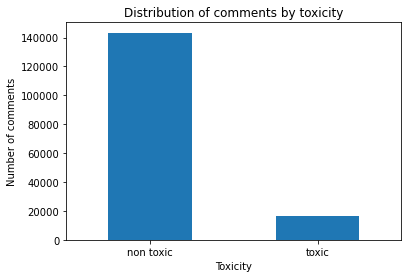

In [14]:
df.groupby('toxic').text.count().sort_values(ascending=False).plot(kind='bar', rot=0)
plt.title('Distribution of comments by toxicity')
plt.ylabel('Number of comments')
plt.xlabel('Toxicity')
plt.xticks([0, 1], ['non toxic', 'toxic'])
plt.show()

In [15]:
df.toxic.mean()

0.10167887648758234

Видим, что только 10% из комментариев помечены как токсичные. Нужно будет учесть это при разбиении выборок для обучения и предсказания моделей.

We see that only 10% of the comments are marked as toxic. We will need to take this into account when splitting samples for training and testing models.

Уберем из текста ссылки на страницы.

We will remove links to pages from the text.

In [16]:
def delete_links(data):
    data = re.sub(r'^https?:\/\/.*[\r\n]*', '', data, flags=re.MULTILINE)
    return data

In [17]:
df['text'] = df['text'].apply(delete_links)

In [18]:
df.head(20)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


Заменим основные сокращения английского языка.

Let's replace the main abbreviations of the English language.

In [19]:
df['text'] = df['text'].transform(lambda x: x\
.replace(" won't ", ' will not ')\
.replace("can't ", 'cannot ')\
.replace("n't ", ' not ')\
.replace("'s ", ' is ')\
.replace("'m ", ' am ')\
.replace("'ll ", ' will ')\
.replace("'d ", ' would ') \
.replace("'re ", ' are ')\
.replace("'ve ", ' have ')\
.replace("\n", " ")
                                 )
# yes, "'d" it's a little problem

In [20]:
df.head()

,text,toxic
0,Explanation Why the edits made under my userna...,0
1,D'aww! He matches this background colour I am ...,0
2,"Hey man, I am really not trying to edit war. I...",0
3,""" More I cannot make any real suggestions on i...",0
4,"You, sir, are my hero. Any chance you remember...",0


Переведем текст комментариев в нижний регистр и оставим только английские слова.

Let's convert the text of the comments to lowercase and leave only English words.

In [21]:
df['text'] = df['text'].apply(str.lower)

In [22]:
df.head()

,text,toxic
0,explanation why the edits made under my userna...,0
1,d'aww! he matches this background colour i am ...,0
2,"hey man, i am really not trying to edit war. i...",0
3,""" more i cannot make any real suggestions on i...",0
4,"you, sir, are my hero. any chance you remember...",0


In [23]:
df['text'] = df['text'].transform(lambda x: re.sub(r'[^a-z ]', ' ', x))

In [24]:
df.head()

,text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i am ...,0
2,hey man i am really not trying to edit war i...,0
3,more i cannot make any real suggestions on i...,0
4,you sir are my hero any chance you remember...,0


### Лемматизация / Lemmatization

Проведем лемматизацию комментариев [с соответствующим POS-тегом](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/).

Let's lemmatize the comments [with the appropriate POS tag](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/).

In [25]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [26]:
lemmatizer = WordNetLemmatizer()

Лемматизация занимает примерно 22 минуты, поэтому мы однажды прогнали этот код и выгрузили новый `.csv` файл с уже лемматизированным текстом. Теперь мы код лемматизации закомментируем и подгрузим с Гугл диска уже готовый документ с лемматизацией.

Lemmatization takes about 22 minutes, so we ran this code one day and uploaded a new `.csv` file with text already lemmatized. Now we will comment out the lemmatization code and upload a ready-made document with lemmatization from Google Drive.

In [27]:
# %%time
# df['text'] = df['text'].transform(lambda x: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()]))

In [28]:
try:
    df = pd.read_csv(path4,
                    index_col=0)
except Exception as err:
    try:
        df = pd.read_csv(url, 
                         index_col=0
#                          engine='python'
                        )
    except Exception as err:
        print('File reading error:', repr(err))

In [29]:
df.head()

,text,toxic
0,explanation why the edits make under my userna...,0
1,d aww he match this background colour i be see...,0
2,hey man i be really not try to edit war it be ...,0
3,more i cannot make any real suggestion on impr...,0
4,you sir be my hero any chance you remember wha...,0


После предобработки проверим таблицу на пропуски.

After preprocessing, check the table for missing data.

In [30]:
def display_missing(data):
    try:
        display(data.stb.missing(style=True))
    except Exception as err:
        try:
            display(data.isna().sum())
        except Exception as err:
            print('File reading error:', repr(err))

In [31]:
display_missing(df)

,missing,total,percent
text,93,"159,571",0.06%
toxic,0,"159,571",0.00%


Удалим образовавшиеся пропуски в данных после удаления ссылок и/или стоп-слов.

Let's remove the resulting missing data after removing links and/or stop words.

In [32]:
df.dropna(inplace=True)

Разделим данные на тренировочный, валидационный и тестовый набор.

Let's divide the data into training, validation and test sets.

In [33]:
X_train_valid, X_test, target_train_valid, target_test = train_test_split(
    df['text'],
    df['toxic'],
    test_size=0.2,
    random_state=STATE,
    stratify=df['toxic']
) 
X_train, X_valid, target_train, target_valid = train_test_split(
    X_train_valid,
    target_train_valid,
    test_size=0.25,
    random_state=STATE,
    stratify=target_train_valid
) 

Проверим процентное содержание токсичных комментариев в каждой из выборок.

Let's check the percentage of toxic comments in each of the samples.

In [34]:
target_train_valid.mean(), target_train.mean(), target_valid.mean(), target_test.mean()

(0.10169146117790911,
 0.10168676713416801,
 0.10170554301479809,
 0.10167419112114372)

В каждой выборке примерно по 10% токсичных комментариев, что согласуется с общей таблицей.

Each sample contains approximately 10% of toxic comments, which is consistent with the overall table.

### Масштабирование данных с помощью TF-IDF / Data scaling with TF-IDF

При построении пайплайна будем проводить токенизацию комментариев с построением словаря важности известных слов, использовав стоп-слова.

When building a pipeline, we will tokenize comments with the construction of a dictionary of the importance of known words using stop words.

In [35]:
stop_words = set(stopwords.words('english'))

stop_words = set([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in stop_words])

In [36]:
count_tf_idf = TfidfVectorizer()

Выведем размер получившихся выборок.

Let's look at the size of the resulting sets.

In [37]:
X_train.shape, X_valid.shape, X_train_valid.shape, X_test.shape 

((95686,), (31896,), (127582,), (31896,))

## Обучение / Training

### Качество прогноза / Forecast quality

Для обучения моделей нам понадобится оценить качество прогноза.

У нас есть четкое требование к качеству: значение метрики качества `F1` не меньше 0.75. 

To train the models, we need to evaluate the quality of the forecast.

We have a clear quality requirement: the value of the quality metric `F1` is at least 0.75.

In [38]:
dummy = DummyClassifier(
    strategy = 'stratified', 
    random_state = STATE
    )
dummy.fit(X_train, target_train)

f1_dummy = f1_score(target_valid, dummy.predict(X_valid))

score = dummy.score(X_valid, target_valid)
print(f'Metrics of the baseline model:\nF1: {f1_dummy:.3f}\naccuracy: {score:.3f}')

Metrics of the baseline model:
F1: 0.108
accuracy: 0.815


Видим, что модель точно предсказала токсичность 82% комментариев, однако метрика F1 достаточно низкая, похоже, имеем дело с большим количеством ошибок первого и второго рода.

We see that the model accurately predicted the toxicity of 82% of comments, however, the F1 metric is quite low, it seems that we are dealing with a large number of errors of the first and second types.

Оформим результат в таблицу.

Let's put the result in a table.

In [39]:
results = pd.DataFrame(columns=['valid_F1'])
results.loc['dummy', 'valid_F1'] = round(f1_dummy, 3)
results

,valid_F1
dummy,0.108


### Модель логистической регрессии / Logistic regression model

Построим пайплайн для модели логистической регрессии.

Для модели будем использовать только те токены, которые встречаются по крайней мере в **трех документах** (токен, который встретился только в одном-двух документах, вряд ли встретится в тестовом наборе и поэтому бесполезен). С помощью параметра `min_df` мы можем задать минимальное количество документов, в котором должен появиться токен.



Let's build a pipeline for the logistic regression model.

For the model, we will use only those tokens that occur in at least **three documents** (a token that occurs only in one or two documents is unlikely to occur in the test set and is therefore useless). With the `min_df` parameter, we can set the minimum number of documents in which the token should appear.

In [40]:
pipe_lr = Pipeline([
    ('vectorizer', count_tf_idf),
    ('model', LogisticRegression()),

])

params_lr = [
    {
        'vectorizer__stop_words': [stop_words],
        'vectorizer__ngram_range': [(1, 2)],
        'vectorizer__min_df': [3],
        'vectorizer__max_df': [
                               0.7, 
                              #  0.8
                               ],
        # 'vectorizer__max_features': [80000, None],
        'model': [LogisticRegression()],
        # 'model__solver': ['saga'],
#         'model__class_weight': ['balanced', {0:1, 1:3}],
        'model__class_weight': [{0:1, 1:3}],
        'model__n_jobs': [-1],
        'model__random_state': [STATE],
        # 'model__C': np.logspace(-3,3,7), # before
        # # 'model__C': [0.01], # after
        # 'model__penalty': [
                          #  'elasticnet', 
                          #  'l1', 
                          #  'l2', 
                          #  'none'
                          #  ], # before
        # # 'model__penalty': ['l1'], # after
        'model__max_iter': [100000]

    },
]

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=STATE)
cv = KFold(n_splits=3, shuffle=True, random_state=STATE)

In [41]:
grid_lr = GridSearchCV(pipe_lr, param_grid=params_lr, cv=cv, n_jobs=-1, scoring='f1', verbose=2)

In [42]:
%%time
grid_lr.fit(X_train_valid, target_train_valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Wall time: 1min 10s


GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(class_weight={0: 1,
                                                                     1: 3},
                                                       max_iter=100000,
                                                       n_jobs=-1,
                                                       random_state=12345)],
                          'model__class_weight': [{0: 1, 1: 3}],
                          'model__max_iter': [100000], 'model__n_...
                          'vectorizer__max_df': [0.7],
                          'vectorizer__min_df': [3],
                          'vectorizer__ngram_range': [(1, 2)],
                          'vectorizer__stop_words': [{'a', 'about', 'above',
                                                      'after', 'again',
                                                      'against', 'ain', 'all',
                                                      'an', 'and', 'any',
                                                      'aren', "aren't", 'at',
                                                      'be', 'because', 'before',
                                                      'below', 'between',
                                                      'both', 'but', 'by',
                                                      'can', 'couldn',
                                                      "couldn't", 'd', 'didn',
                                                      "didn't", 'do', 'doesn', ...}]}],
             scoring='f1', verbose=2)

In [43]:
lr_f1 = grid_lr.best_score_
print('Best Params:', grid_lr.best_params_)
print()
print('Best F1 Score:', lr_f1)

Best Params: {'model': LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=100000, n_jobs=-1,
                   random_state=12345), 'model__class_weight': {0: 1, 1: 3}, 'model__max_iter': 100000, 'model__n_jobs': -1, 'model__random_state': 12345, 'vectorizer__max_df': 0.7, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2), 'vectorizer__stop_words': {'hers', 'when', 'wasn', "needn't", 'me', 'couldn', 'for', 'these', 'm', "it's", 'ourselves', 'yourselves', 'so', 'hadn', 'my', 'yourself', 'during', 'd', "hadn't", 'not', 'have', 'any', "wouldn't", 'over', 'where', "don't", 'isn', 'do', 'some', 'mightn', "couldn't", 'no', 'those', 'it', 'ain', 'only', 'on', 't', "shouldn't", 'both', 'll', 'haven', 'then', 'to', 'again', 'own', "mightn't", 'because', 'don', 'at', 'out', 'until', "you'll", 'their', 'i', "didn't", 'our', 'shan', "won't", 'here', 'under', 'we', 'aren', 'down', 'needn', "shan't", 'wouldn', 'her', 'off', 'few', 'him', 'themselves', "doesn't", 'mustn', 'o', 'hasn', '

Кросс-валидацией нашли лучшую модель, сохраним ее.

Cross-validation found the best model, let's save it.

In [44]:
%%time
lr_model = grid_lr.best_estimator_

lr_model.fit(X_train, target_train)
lr_predicts = lr_model.predict(X_valid)
f1_lr = f1_score(target_valid, lr_predicts)
print(f'F1 of logistic regression model is {f1_lr:.3f}')

F1 of logistic regression model is 0.774
Wall time: 23.7 s


In [45]:
results.loc['logistic regression', 'valid_F1'] = round(f1_lr, 3)
results

,valid_F1
dummy,0.108
logistic regression,0.774


### Модель линейных опорных векторов / Linear support vector model


Построим пайплайн для модели линейных опорных векторов.

<!-- Тут честно признаюсь, что терпения моего не хватило и воспользовалась помощью коллеги Захара с более мощным компом, спросив, что у него показали многочасовые расчеты. -->

Let's build a pipeline for the linear support vector model.

<!-- Тут честно признаюсь, что терпения моего не хватило и воспользовалась помощью коллеги Захара с более мощным компом, спросив, что у него показали многочасовые расчеты. -->

In [46]:
pipe_svc = Pipeline([
    ('vectorizer', count_tf_idf),
    ('model', LinearSVC()),


])

params_svc = [
    {
        'vectorizer__stop_words': [stop_words],
        'vectorizer__ngram_range': [(1, 2)],
        'vectorizer__min_df': [3],
        # 'vectorizer__max_df': [0.7, 0.8],
        'vectorizer__max_df': [0.7],     
        # 'vectorizer__max_features': [80000, None],
        'vectorizer__max_features': [80000],     
        # 'model': [SVC()],
        'model': [LinearSVC()],
        # 'model__class_weight': ['balanced', {0:1, 1:3}],
        'model__class_weight': [{0:1, 1:3}],
        # 'model__n_jobs': [-1],
        'model__random_state': [STATE],
        # 'model__C': np.logspace(-3,3,7),
        'model__C': [0.1], # after
        # 'model__penalty': ['l1', 'l2'],
        'model__penalty': ['l2'],
        'model__max_iter': [100000],
        'model__tol': [1e-10]

    },
]

In [47]:
grid_svc = GridSearchCV(pipe_svc, param_grid=params_svc, cv=cv, n_jobs=-1, scoring='f1', verbose=2)

In [48]:
%%time
grid_svc.fit(X_train_valid, target_train_valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Wall time: 55.1 s


GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('model', LinearSVC())]),
             n_jobs=-1,
             param_grid=[{'model': [LinearSVC(C=0.1, class_weight={0: 1, 1: 3},
                                              max_iter=100000,
                                              random_state=12345, tol=1e-10)],
                          'model__C': [0.1],
                          'model__class_weight': [{0: 1, 1: 3}],
                          'model__max_iter': [100000], 'mode...
                          'vectorizer__max_features': [80000],
                          'vectorizer__min_df': [3],
                          'vectorizer__ngram_range': [(1, 2)],
                          'vectorizer__stop_words': [{'a', 'about', 'above',
                                                      'after', 'again',
                                                      'against', 'ain', 'all',
                                                      'an', 'and', 'any',
                                                      'aren', "aren't", 'at',
                                                      'be', 'because', 'before',
                                                      'below', 'between',
                                                      'both', 'but', 'by',
                                                      'can', 'couldn',
                                                      "couldn't", 'd', 'didn',
                                                      "didn't", 'do', 'doesn', ...}]}],
             scoring='f1', verbose=2)

In [49]:
svc_f1 = grid_svc.best_score_
print('Best Params:', grid_svc.best_params_)
print()
print('Best F1 Score:', svc_f1)

Best Params: {'model': LinearSVC(C=0.1, class_weight={0: 1, 1: 3}, max_iter=100000, random_state=12345,
          tol=1e-10), 'model__C': 0.1, 'model__class_weight': {0: 1, 1: 3}, 'model__max_iter': 100000, 'model__penalty': 'l2', 'model__random_state': 12345, 'model__tol': 1e-10, 'vectorizer__max_df': 0.7, 'vectorizer__max_features': 80000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2), 'vectorizer__stop_words': {'hers', 'when', 'wasn', "needn't", 'me', 'couldn', 'for', 'these', 'm', "it's", 'ourselves', 'yourselves', 'so', 'hadn', 'my', 'yourself', 'during', 'd', "hadn't", 'not', 'have', 'any', "wouldn't", 'over', 'where', "don't", 'isn', 'do', 'some', 'mightn', "couldn't", 'no', 'those', 'it', 'ain', 'only', 'on', 't', "shouldn't", 'both', 'll', 'haven', 'then', 'to', 'again', 'own', "mightn't", 'because', 'don', 'at', 'out', 'until', "you'll", 'their', 'i', "didn't", 'our', 'shan', "won't", 'here', 'under', 'we', 'aren', 'down', 'needn', "shan't", 'wouldn', 'her', 'off

Кросс-валидацией нашли лучшую модель, сохраним ее.

Cross-validation found the best model, let's save it.

In [50]:
%%time
svc_model = grid_svc.best_estimator_

svc_model.fit(X_train, target_train)
svc_predicts = svc_model.predict(X_valid)
f1_svc = f1_score(target_valid, svc_predicts)
print(f'F1 of linear support vector model is {f1_svc:.3f}')

F1 of linear support vector model is 0.779
Wall time: 18.9 s


In [51]:
results.loc['linear svc', 'valid_F1'] = round(f1_svc, 3)
results

,valid_F1
dummy,0.108
logistic regression,0.774
linear svc,0.779


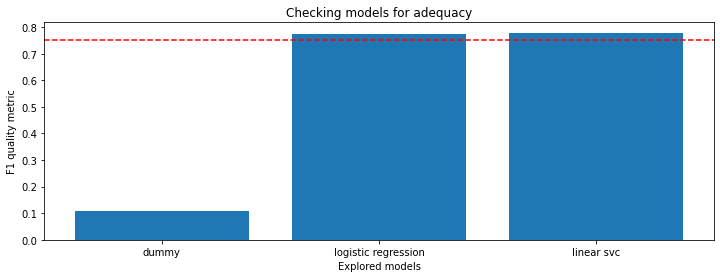

In [52]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(results.index, results.valid_F1)
plt.title('Checking models for adequacy')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel('Explored models')
plt.ylabel('F1 quality metric')
plt.show()

Пока максимальное качество показала модель линейных опорных векторов.

The linear support vector model has shown the maximum quality.

### Подбор порога / Threshold selection

Подобрать подходящий порог для наибольшей метрики качества мы сможем только для модели логистической регрессии, так как у модели линейных опорных векторов нет метода `.predict_proba()`.

We can only choose the appropriate threshold for the highest quality metric for the logistic regression model, since the linear support vector model does not have the `.predict_proba()` method.

Напишем функцию для подбора порога, при котором метрика качества F1 будет иметь максимальное значение.

Let's write a function for selecting the threshold at which the quality metric F1 will have the maximum value.

In [53]:
def threshold_find(start, finish, step, probabilities_one, target, show=True):
    '''function iterates over the specified range elements for the threshold
    and returns the best value of the F1 metric
    start, finish, step - start, end and step for iterating the threshold
    probabilities_one_valid - positive class probabilities
    target - target attribute values
    show - whether to display the values of all metrics, by default - display'''
    
    f1 = 0
    precision = 0
    recall = 0
    threshold = None
    for step_threshold in np.arange(start, finish, step):
        
        predicted = probabilities_one > step_threshold
        step_f1 = f1_score(target, predicted)
        
        if step_f1 > f1:
            f1 = step_f1
            precision = precision_score(target, predicted)
            recall = recall_score(target, predicted)
            threshold = step_threshold
    if show == True:
        print("Threshold = {:.2f} | Recall = {:.3f} | Precision = {:.3f}".format(
            threshold, recall, precision))
        print('F1: {:.3f}'.format(f1))

    return recall, precision, f1, threshold

Подберем наиболее подходящий порог для модели логистической регрессии.

Let's select the most appropriate threshold for the logistic regression model.

In [54]:
lr_probabilities_one_valid = lr_model.predict_proba(X_valid)[:, 1]

recall_lr, precision_lr, f1_lr, threshold_lr = threshold_find(
    0.1, 
    0.99, 
    0.01, 
    lr_probabilities_one_valid,
    target_valid
)

Threshold = 0.52 | Recall = 0.720 | Precision = 0.843
F1: 0.777


In [55]:
results.loc['logistic regression', 'valid_F1'] = round(f1_lr, 3)
results

,valid_F1
dummy,0.108
logistic regression,0.777
linear svc,0.779


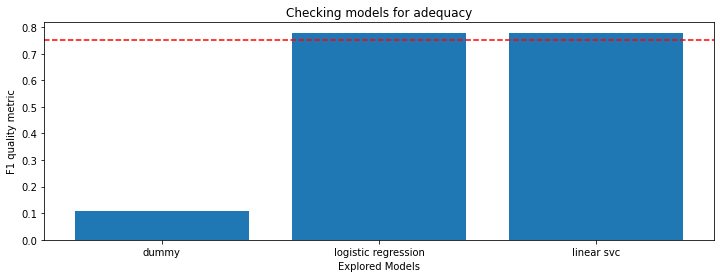

In [56]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(results.index, results.valid_F1)
plt.title('Checking models for adequacy')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel('Explored Models')
plt.ylabel('F1 quality metric')
plt.show()

Даже с подобранным порогом модель линейной регрессии слегка уступает модели линейных опорных векторов.

Even with a fitted threshold, the linear regression model is slightly inferior to the linear support vector model.

### Ансамбль смешивания / Stacked generalization

Далее заинтересовала идея опробовать **ансамбль смешивания**, подробно описанный в [статье](https://habr.com/ru/company/skillfactory/blog/531416/). Для этого  используем две предыдущие модели с уже подобранными гиперпараметрами. Повторим за авторами статьи и будем использовать ансамбль типа пакетирования, где метамодель обучается на прогнозах, сделанных на независимом наборе данных.

У нас на данный момент имеются следующие выборки: `тренировочная`, `валидационная` и `тестовая`, а так же набор выборок `тренировочная + валидационная`.

`Тестовая` зарезервирована для финального тестирования, тогда как остальные - для выбора наиболее удачной модели для данного тестирования. 

Ансамбль смешивания требует наличия еще одной выборки для обучения метамоделей.

Благо мы имеем достаточное количество данных и выделить из тренировочной еще одну выборку для обучения метамодели.

Разделим тренировочную выборку `X_train` на обучающую и валидационную выборки для мета-модели `meta_X_train` и `meta_X_valid`, валидационную выборку не трогаем и сохраним для проверки качества предсказания перед финальным тестированием.

Авторы статьи создавали синтетические данные для задачи бинарной классификации, не требующие предобработки. У нас же данные представлены в виде текста, и нам хотелось бы использовать предобработку данных в виде масштабирования данных с помощью `TF-IDF`. Таким образом, наилучшим вариантом было бы использование не отдельных моделей, а готовых пайплайнов со встроенной предобработкой.



Further, I was interested in the idea of trying out **stacked generalization**, described in detail in [article](https://habr.com/ru/company/skillfactory/blog/531416/). To do this, we use the two previous models with already selected hyperparameters. Let's repeat after the authors of the article and we will use a packet type stacked generalization, where the meta-model is trained on predictions made on an independent data set.

We currently have the following sets: `train`, `validation` and `test`, as well as a set `train + validation`.

`Test` is reserved for final testing, while the rest are for choosing the most successful model for this testing.

Stacked generalization requires one more set to train the metamodels.

Fortunately, we have enough data and select one more set from the train set for training the metamodel.

We divide the train set `X_train` into train and validation sets for the meta-model `meta_X_train` and `meta_X_valid`, leave the validation set intact and save it to check the quality of the prediction before final testing.

The authors of the article created synthetic data for the binary classification problem that did not require preprocessing. In our case, the data is presented in the form of text, and we would like to use data preprocessing in the form of data scaling using `TF-IDF`. Thus, the best option would be to use not separate models, but ready-made pipelines with built-in preprocessing.

Разделим обучающую выборку на выборки для мета-модели.

Let's divide the train set into sets for the meta-model.

In [57]:
meta_X_train, meta_X_valid, meta_target_train, meta_target_valid = train_test_split(
    X_train,
    target_train,
    test_size=0.33,
    random_state=STATE,
    stratify=target_train
)

Далее в статье авторы определяли *функцию `get_models()`, которая возвращает список моделей, где каждая модель определяется как кортеж с названием и настроенным классификатором*

Мы же в отличие от этого, создадим функцию не с моделями, а с пайплайнами с уже подобранными ранее параметрами.

Later in the article, the authors defined a *function `get_models()` that returns a list of models, where each model is defined as a tuple with a name and a configured classifier*

In contrast, we will create a function not with models, but with pipelines with previously selected parameters.

In [58]:
pipe_lr = Pipeline([
    ('vectorizer', TfidfVectorizer(
        stop_words=stop_words,
        ngram_range=(1, 2),
        min_df=3,
        max_df=0.7,
        
    )),
    ('model', LinearSVC(
        class_weight={0: 1, 1: 3}, 
        max_iter=100000, 
        random_state=STATE
    ))
])

pipe_svc = Pipeline([
    ('vectorizer', TfidfVectorizer(
        stop_words=stop_words,
        ngram_range=(1, 2),
        min_df=3,
        max_df=0.7,
        max_features=80000,
        
    )),
    ('model', LinearSVC(
        class_weight={0: 1, 1: 3},
        max_iter=100000,
        random_state=STATE,
        C=0.1,
        penalty='l2',
        tol=1e-10,
    ))
])


pipes = [pipe_lr, pipe_svc]

Авторы статьи пишут после создания моделей:

*Далее нам нужно обучить смешивающую модель. Базовые модели обучаются на тренировочном наборе данных. Метамодель обучается на прогнозах, сделанных каждой базовой моделью на независимом наборе данных.*

*Во-первых, мы можем в цикле перечислить модели в списке и обучить каждую из них по очереди на обучающем наборе данных. Кроме того, в этом цикле мы можем использовать обученную модель, чтобы сделать прогноз на независимом наборе данных (валидации) и сохранить прогнозы на будущее.*

Модифицируем их функцию под нашу задачу.

The authors of the article write after creating the models:

*Next, we need to train the blending model. Base models are trained on the training dataset. The metamodel is trained on the predictions made by each base model on an independent dataset.*

*First, we can loop through the models in the list and train each of them in turn on the training dataset. Also, in this loop, we can use the trained model to make a prediction on an independent dataset (validation) and store the predictions for the future.*

We modify their function for our task.

In [59]:
# fit the blending ensemble
def fit_ensemble(pipes, X_train_meta, X_valid_meta, y_train_meta, y_valid_meta):
# fit all pipes on the training set and predict on hold out set
    meta_X = list()
    for pipe in pipes:
        # fit in training set
        pipe.fit(X_train_meta, y_train_meta)
        # predict on hold out set
        yhat = pipe.predict(X_valid_meta)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
        # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # define blending model
    blender = LogisticRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_valid_meta)
    return blender

Авторы пишут: 

*Теперь у нас есть `meta_X`, представляющий входные данные, которые могут использоваться для обучения метамодели.* 

*Каждый столбец или объект представляет выходные данные одной базовой модели. Каждая строка представляет собой один сэмпл из независимого набора данных.*

*Мы можем применить функцию `hstack()` чтобы гарантировать, что этот набор данных представляет собой двумерный массив numpy, как и ожидалось моделью машинного обучения.*

*Теперь мы можем тренировать нашу метамодель. Это может быть любая модель машинного обучения, которая нам нравится, например логистическая регрессия для задачи классификации.*


The authors write:

*We now have a `meta_X` representing input that can be used to train the metamodel.*

*Each column or object represents the output of one base model. Each line represents one sample from an independent dataset.*

*We can use the `hstack()` function to ensure that this dataset is a two-dimensional numpy array, as expected by the machine learning model.*

*Now we can train our metamodel. This can be any machine learning model we like, such as logistic regression for a classification problem.*

*Следующий шаг* — **использование смешивающего ансамбля для прогнозирования новых данных**. *Это двухэтапный процесс.* 

- *Первый шаг — использование каждой базовой модели для прогнозирования.* 
- *Затем прогнозы собираются вместе и используются в качестве входных данных для модели смешивания, чтобы сделать окончательный прогноз.*

*Мы можем использовать тот же цикл, что и при обучении модели. То есть собрать прогнозы каждой базовой модели в обучающий набор данных, сложить прогнозы вместе и вызвать `predict()` в смешивающей модели с этим набором данных метауровня. Функция `predict_ensemble()` ниже реализует эти действия.*

*Учитывая обучение списка базовых моделей, обучение смешивателя ансамбля и набор данных (например, тестовый набор данных или новые данные), для набора данных она вернёт набор прогнозов.*

*The next step is to* **use the blending ensemble to predict the new data**. *This is a two step process.*

- *The first step is to use each base model for forecasting.*
- *The predictions are then put together and used as input to a blending model to make the final prediction.*

*We can use the same loop as when training the model. That is, gather the predictions of each base model into the training dataset, add the predictions together, and call `predict()` on the blending model with that meta-level dataset. The `predict_ensemble()` function below implements these actions.*

*Given base model list training, ensemble mixer training, and a dataset (e.g. test dataset or new data), it will return a prediction set for the dataset.*

In [60]:
# make a prediction with the blending ensemble
def predict_ensemble(pipes, blender, X_test):
# make predictions with base pipes
    meta_X = list()
    for pipe in pipes:
        # predict with base model
        yhat = pipe.predict(X_test)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = hstack(meta_X)
    # predict
    return blender.predict(meta_X)

Теперь у нас есть все элементы, необходимые для реализации смешанного ансамбля.

Now we have all the elements needed to implement a blending ensemble.

Оценим размер выборок.

Let us estimate the size of the sets.

In [61]:
meta_X_train.shape, meta_X_valid.shape, X_valid.shape

((64109,), (31577,), (31896,))

А так же содержание токсичных комментариев в новых выборках.

As well as the content of toxic comments in new sets.

In [62]:
meta_target_train.mean(), meta_target_valid.mean()

(0.10168619070645307, 0.10168793742280774)

Содержание токсичных комментариев в районе 10%.

The content of toxic comments is around 10%.

Посмотрим, как справиться ансамбль с нашей задачей.

Let's see how the blending ensemble copes with our task.

Обучим ансамбль.

Let's train the blending ensemble.

In [63]:
%%time
blender = fit_ensemble(pipes, meta_X_train, meta_X_valid, meta_target_train, meta_target_valid)

Wall time: 28 s


Получим предсказания на валидационной выборке (та самая выборка, на которой оценивались по отдельности модели линейной регрессии и линейных опорных векторов).

Let's get predictions on the validation set (the same set on which the linear regression and linear support vector models were evaluated separately).

In [64]:
ensemble_predicts = predict_ensemble(pipes, blender, X_valid)

Посчитаем метрику качества для предсказаний ансамбля.

Let's calculate the quality metric for the blending ensemble predictions.

In [65]:
f1_ensemble = f1_score(target_valid, ensemble_predicts)
print(f'F1 of the blending ensemble is {f1_ensemble:.3f}')

F1 of the blending ensemble is 0.765


Качество от ансамбля получилось меньше ожидаемого и хуже, чем от использованных в нем моделей поотдельности.

The quality of the blending ensemble turned out to be less than expected and worse than from the models used in it separately.

In [66]:
results.loc['ensemble', 'valid_F1'] = round(f1_ensemble, 3)
results

,valid_F1
dummy,0.108
logistic regression,0.777
linear svc,0.779
ensemble,0.765


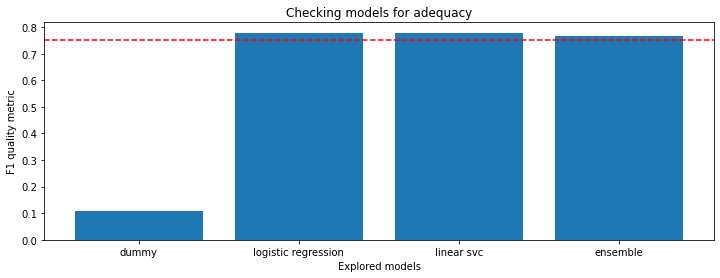

In [67]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.bar(results.index, results.valid_F1)
plt.title('Checking models for adequacy')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel('Explored models')
plt.ylabel('F1 quality metric')
plt.show()

- Модели обучаются достаточно долго, обучать некоторые модели не поднялась рука (например, случайного леса и градиентного бустинга).
- Для финального тестирования выбрана **модель линейных опорных векторов**.

- Models are trained for a long time, it was not possible to train some models (for example, random forest and gradient boosting).
- **linear support vector model** was chosen for final testing.

## Тестирование / Testing

Обучим модель линейных опорных векторов на `тренировочной + валидационная` выборках и проверим на `тестировочной`.

Let's train the linear support vector model on the `train + validation` sets and check on the `test` one.

In [68]:
%%time
svc_model.fit(X_train_valid, target_train_valid)
svc_predicts_final = svc_model.predict(X_test)
f1_svc_final = f1_score(target_test, svc_predicts_final)
print(f'F1 on the test set for the linear support vector model is {f1_svc_final:.3f}')
print()

F1 on the test set for the linear support vector model is 0.794

Wall time: 25.9 s


## Выводы / Conclusions

Данный проект был посвященн **поиску токсичных комментариев для интернет-магазина**. 

Нашей **задачей** являлось обучить модель **классифицировать комментарии на позитивные и негативные**.

Необходимым условием было построить модель со значением метрики качества **F1 не меньше 0.75**.

- В рамках данной работы была проведена **предобработка текста** с приведением комментариев к нижнему регистру, удалению ссылок и лемматизацией. 

- Для обучения моделей классифицировать комментарии была применена техника масштабирования данных с помощью **TF-IDF**.

- В рамках проекта были обучены модели логистической регрессии и линейных опорных векторов. 

- Для финального **тестирования** была выбрана **модель линейных опорных векторов**, лучше показавшая себя на кросс-валидации.

**Метрика качества F1** на тестовой выборке равна **0.79**, что согласуется с целью исследования, а так же показывает то, что модель не переобучилась.



This project was dedicated to **finding toxic comments for an online store**.

Our **task** was to train the model to **classify comments into positive and negative**.

A necessary condition was to build a model with the value of the quality metric **F1 not less than 0.75**.

- As part of this work, **text preprocessing** was carried out with comments reduced to lower case, links removed and lemmatization.

- To train models to classify comments, the data scaling technique was applied using **TF-IDF**.

- As part of the project, logistic regression and linear support vector models were trained.

- For the final **testing**, **linear support vector model** was chosen, which showed itself better in cross-validation.

**The quality metric F1** on the test sample is **0.79**, which is consistent with the purpose of the study, and also shows that the model has not retrained.